In [38]:
import pandas as pd
import numpy as np
import seaborn as sb
import requests
import json
from pprint import pprint
import warnings
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

warnings.simplefilter("ignore", UserWarning)

In [3]:
data = pd.read_csv('2017.csv', encoding='cp1252')
data1 = pd.read_csv('2018.csv', encoding='cp1252')
data2 = pd.read_csv('2019.csv', encoding='cp1252')
data3 = pd.read_csv('2020.csv', encoding='cp1252')

frames = [data,data1,data2,data3]

df = pd.concat(frames)
df

C:\Users\ktoor\AppData\Local\Temp\ipykernel_8976\858266631.py:1: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('2017.csv', encoding='cp1252')
C:\Users\ktoor\AppData\Local\Temp\ipykernel_8976\858266631.py:3: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('2019.csv', encoding='cp1252')


,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
0,1,Alabama,10001,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0.0,None,0.0,None,0.0,None,1,0
1,1,Alabama,10002,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0.0,None,0.0,None,0.0,None,1,0
2,1,Alabama,10003,3,3,0,0,3,3,0,...,88,Not Applicable (Not Transported),0.0,None,0.0,None,0.0,None,1,0
3,1,Alabama,10004,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),20.0,Police Pursuit Involved,0.0,None,0.0,None,1,0
4,1,Alabama,10005,1,1,0,0,2,2,0,...,11,11,0.0,None,0.0,None,0.0,None,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35930,56,Wyoming,560111,2,2,0,0,2,2,0,...,88,Not Applicable (Not Transported),NaN,NaN,NaN,NaN,NaN,NaN,1,0
35931,56,Wyoming,560112,3,3,0,0,8,8,0,...,50,50,NaN,NaN,NaN,NaN,NaN,NaN,2,0
35932,56,Wyoming,560113,3,3,0,0,9,9,0,...,99,Unknown EMS Hospital Arrival Time,NaN,NaN,NaN,NaN,NaN,NaN,1,0
35933,56,Wyoming,560114,2,2,0,1,3,3,1,...,88,Not Applicable (Not Transported),NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [4]:
#Scrapping Data
states_list = pd.read_html('https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm')
states_list_1 = states_list[0]
state_abbr = states_list_1[[0,2]]
state_abbr_1 = states_list_1[[3,5]]


ind_remove = [0,28]
state_1 = state_abbr.drop(ind_remove).rename(columns={
    0 : 'STATENAME',
    2 : 'STATE'
})

ind_remove_1 = [0,27,28]
state_2 = state_abbr_1.drop(ind_remove_1).rename(columns={
    3 : 'STATENAME',
    5 : 'STATE'
})

frames1 = [state_1,state_2]
states_list = pd.concat(frames1)
states_list

,STATENAME,STATE
1,Alabama,01
2,Alaska,02
3,Arizona,04
4,Arkansas,05
5,California,06
6,Colorado,08
7,Connecticut,09
8,Delaware,10
9,District of Columbia,11
10,Florida,12


In [5]:
#API
year_list = [2017,2018,2019]
population_171819 = []

for years in year_list:
    base_url = f'https://api.census.gov/data/{years}/pep/population'
    params = {
    'get' : 'POP',
    'for' : 'STATE:*',
    'key' : '60a95aa0242affd79076a8b964cd2c4516142c32'
    }
    data = requests.get(base_url,params=params).json()
    data = pd.DataFrame(data)
    data['YEAR'] = f'{years}'
    population_171819.append(data)

In [6]:
pop_17 = population_171819[0]
pop_18 = population_171819[1]
pop_19 = population_171819[2]

ind_remove_10 = [0]
pop_17_list = pop_17.drop(ind_remove_10).rename(columns={
    0 : 'POPULATION',
    1 : 'STATE'
})

ind_remove_11 = [0]
pop_18_list = pop_18.drop(ind_remove_11).rename(columns={
    0 : 'POPULATION',
    1 : 'STATE'
})

ind_remove_12 = [0]
pop_19_list = pop_19.drop(ind_remove_12).rename(columns={
    0 : 'POPULATION',
    1 : 'STATE'
})

frames2 = [pop_17_list,pop_18_list,pop_19_list]
pop_171819 = pd.concat(frames2)
pop_171819

,POPULATION,STATE,YEAR
1,693972,11,2017
2,20984400,12,2017
3,10429379,13,2017
4,1427538,15,2017
5,1716943,16,2017
...,...,...,...
48,7614893,53,2019
49,1792147,54,2019
50,5822434,55,2019
51,578759,56,2019


In [7]:
pop_171819[["POPULATION"]] = pop_171819[["POPULATION"]].astype(int)
pop_171819.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 1 to 52
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   POPULATION  156 non-null    int32 
 1   STATE       156 non-null    object
 2   YEAR        156 non-null    object
dtypes: int32(1), object(2)
memory usage: 4.3+ KB


In [8]:
pop_171819['POPULATION'] = pop_171819['POPULATION'].astype(float)

by_state = pop_171819[(pop_171819["YEAR"] == "2019")]
by_state['POPULATION'] = by_state['POPULATION'] * 1.004
by_state["YEAR"] = 2020




by_state = pd.DataFrame(by_state)

# by_state["STATE"] = by_state.index
# by_state


# by_state["POPULATION"] = by_state["POPULATION"].astype(int)
# by_state
frame3 = [pop_171819,by_state]
final_pop =  pd.concat(frame3)
final_pop


C:\Users\ktoor\AppData\Local\Temp\ipykernel_8976\4092341711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_state['POPULATION'] = by_state['POPULATION'] * 1.004
C:\Users\ktoor\AppData\Local\Temp\ipykernel_8976\4092341711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_state["YEAR"] = 2020


,POPULATION,STATE,YEAR
1,6.939720e+05,11,2017
2,2.098440e+07,12,2017
3,1.042938e+07,13,2017
4,1.427538e+06,15,2017
5,1.716943e+06,16,2017
...,...,...,...
48,7.645353e+06,53,2020
49,1.799316e+06,54,2020
50,5.845724e+06,55,2020
51,5.810740e+05,56,2020


In [9]:
4903185*1.004

4922797.74

In [10]:
d=['STATE','YEAR']
for i in d:
    final_pop[i]=pd.to_numeric(final_pop[i])

In [11]:
df1 = pd.merge(final_pop,df, on = ["STATE","YEAR"])
df1

,POPULATION,STATE,YEAR,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
0,693972.000,11,2017,District of Columbia,110001,1,1,0,0,3,...,99,Unknown EMS Hospital Arrival Time,13.0,Aggressive Driving / Road Rage by Non-contact ...,0.0,None,0.0,None,3,1
1,693972.000,11,2017,District of Columbia,110002,2,2,0,0,2,...,24,24,0.0,None,0.0,None,0.0,None,1,0
2,693972.000,11,2017,District of Columbia,110003,1,1,0,1,1,...,0,0,0.0,None,0.0,None,0.0,None,1,0
3,693972.000,11,2017,District of Columbia,110004,1,1,0,1,1,...,99,Unknown EMS Hospital Arrival Time,0.0,None,0.0,None,0.0,None,1,1
4,693972.000,11,2017,District of Columbia,110005,3,1,2,1,1,...,99,Unknown EMS Hospital Arrival Time,14.0,"Motor Vehicle struck by falling cargo,or somet...",0.0,None,0.0,None,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137896,581074.036,56,2020,Wyoming,560111,2,2,0,0,2,...,88,Not Applicable (Not Transported),NaN,NaN,NaN,NaN,NaN,NaN,1,0
137897,581074.036,56,2020,Wyoming,560112,3,3,0,0,8,...,50,50,NaN,NaN,NaN,NaN,NaN,NaN,2,0
137898,581074.036,56,2020,Wyoming,560113,3,3,0,0,9,...,99,Unknown EMS Hospital Arrival Time,NaN,NaN,NaN,NaN,NaN,NaN,1,0
137899,581074.036,56,2020,Wyoming,560114,2,2,0,1,3,...,88,Not Applicable (Not Transported),NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [12]:
total_population = df1.groupby(["STATENAME"])["POPULATION"].mean()
total_population

STATENAME
Alabama                 4.897015e+06
Alaska                  7.361027e+05
Arizona                 7.194913e+06
Arkansas                3.017190e+06
California              3.957043e+07
Colorado                5.708943e+06
Connecticut             3.576757e+06
Delaware                9.701328e+05
District of Columbia    7.027545e+05
Florida                 2.133499e+07
Georgia                 1.055748e+07
Hawaii                  1.421236e+06
Idaho                   1.761186e+06
Illinois                1.273496e+07
Indiana                 6.712048e+06
Iowa                    3.156229e+06
Kansas                  2.915760e+06
Kentucky                4.468916e+06
Louisiana               4.665280e+06
Maine                   1.342021e+06
Maryland                6.053080e+06
Massachusetts           6.893557e+06
Michigan                9.993663e+06
Minnesota               5.623039e+06
Mississippi             2.983916e+06
Missouri                6.135240e+06
Montana                 1.06

In [13]:
total_accidents = df1.groupby(["STATENAME"])["VE_TOTAL"].sum()
total_accidents.astype(float)


STATENAME
Alabama                  5305.0
Alaska                    381.0
Arizona                  5733.0
Arkansas                 3078.0
California              22486.0
Colorado                 3666.0
Connecticut              1634.0
Delaware                  700.0
District of Columbia      173.0
Florida                 19151.0
Georgia                  9172.0
Hawaii                    586.0
Idaho                    1277.0
Illinois                 6402.0
Indiana                  5141.0
Iowa                     1893.0
Kansas                   2348.0
Kentucky                 4337.0
Louisiana                4414.0
Maine                     854.0
Maryland                 3315.0
Massachusetts            1979.0
Michigan                 6119.0
Minnesota                2196.0
Mississippi              3674.0
Missouri                 5400.0
Montana                   924.0
Nebraska                 1378.0
Nevada                   1891.0
New Hampshire             642.0
New Jersey               3425.

In [14]:
accident_rate = total_accidents.div(total_population) * 100

accident_rate_df = pd.DataFrame(accident_rate)
accident_rate_df["STATENAME"] = accident_rate_df.index

total_accidents = pd.DataFrame(total_accidents)
total_population = pd.DataFrame(total_population)

In [15]:
accident_rate

STATENAME
Alabama                 0.108331
Alaska                  0.051759
Arizona                 0.079681
Arkansas                0.102015
California              0.056825
Colorado                0.064215
Connecticut             0.045684
Delaware                0.072155
District of Columbia    0.024617
Florida                 0.089763
Georgia                 0.086877
Hawaii                  0.041232
Idaho                   0.072508
Illinois                0.050271
Indiana                 0.076594
Iowa                    0.059977
Kansas                  0.080528
Kentucky                0.097048
Louisiana               0.094614
Maine                   0.063635
Maryland                0.054766
Massachusetts           0.028708
Michigan                0.061229
Minnesota               0.039054
Mississippi             0.123127
Missouri                0.088016
Montana                 0.086848
Nebraska                0.071340
Nevada                  0.061968
New Hampshire           0.047345


<AxesSubplot:title={'center':'Population VS States'}, xlabel='State Names', ylabel='Accident Rate'>

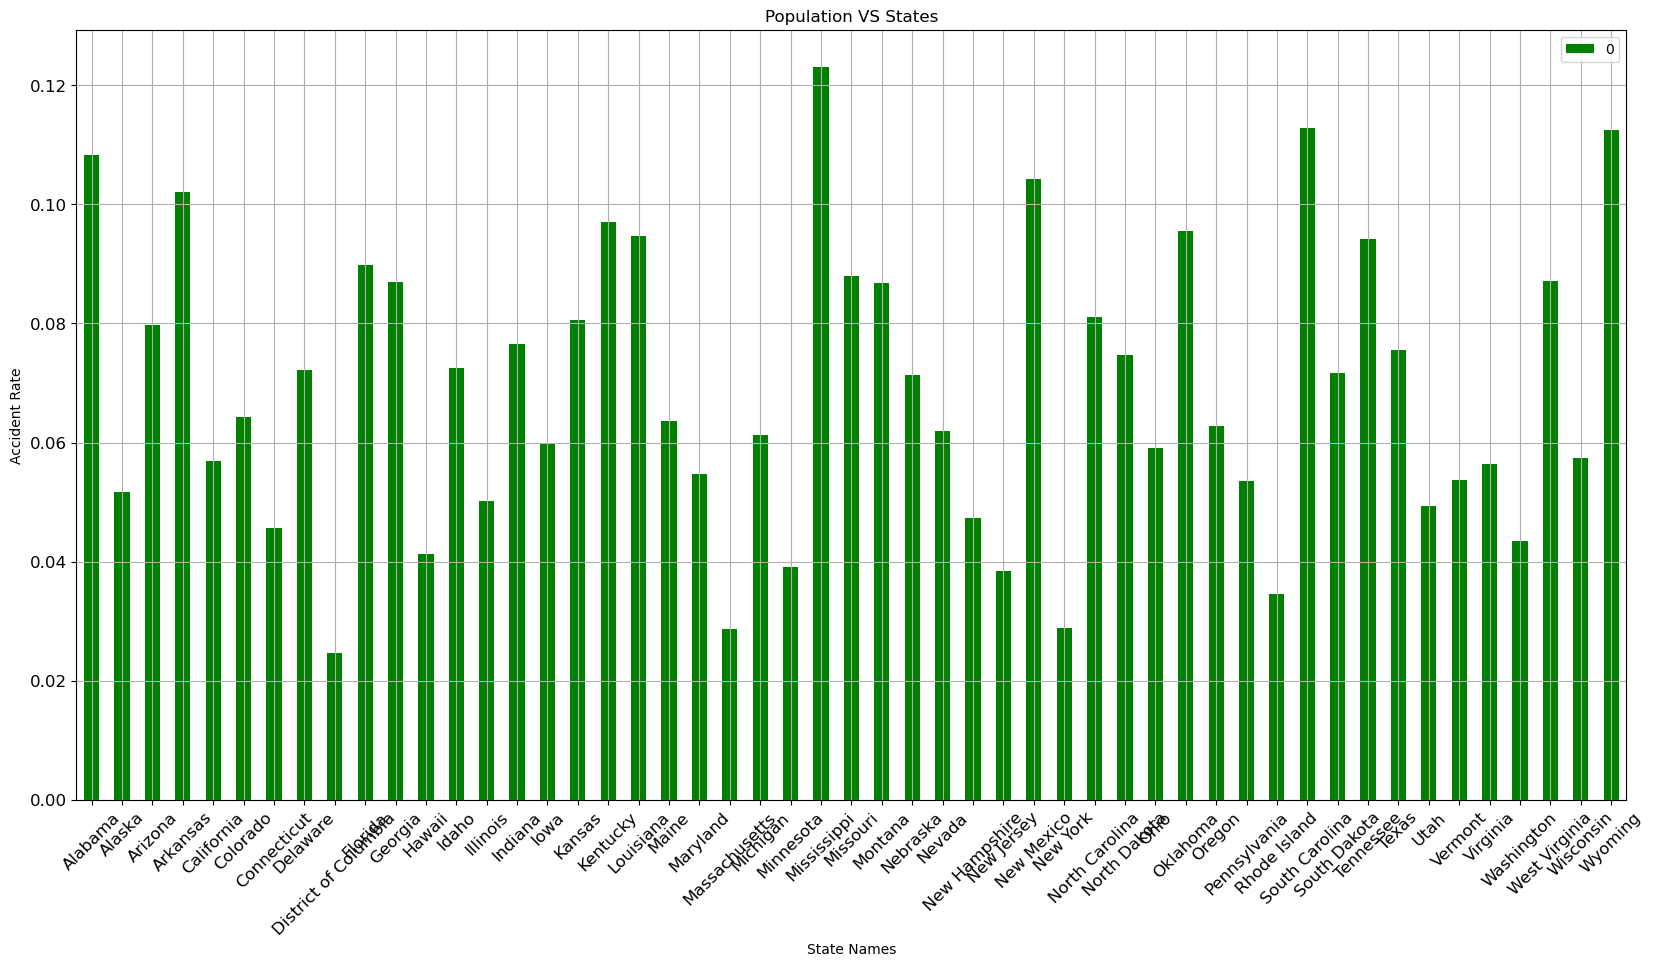

In [66]:
accident_rate_df.plot(kind='bar', color = ["green"], figsize = (20, 10), rot = 45, fontsize = 12, xlabel= "State Names", ylabel = "Accident Rate", title = "Population VS States", grid = True)

In [17]:
max_idx = accident_rate_df[0].idxmax()

max_val_col1 = round(accident_rate_df.loc[max_idx, 0],3)
max_val_col2 = accident_rate_df.loc[max_idx, 'STATENAME']
misp = total_accidents[(total_accidents.index == max_val_col2)]
num= misp["VE_TOTAL"][0]

print(f"State with highest accident rate is {max_val_col2} with {num} accidents and a rate of {max_val_col1}%")

State with highest accident rate is Mississippi with 3674 accidents and a rate of 0.123%


In [18]:
min_idx = accident_rate_df[0].idxmin()

min_val_col1 = round(accident_rate_df.loc[min_idx, 0],3)
min_val_col2 = accident_rate_df.loc[min_idx, 'STATENAME']

misp = total_accidents[(total_accidents.index == min_val_col2)]
num= misp["VE_TOTAL"][0]

print(f"State with lowest accident rate is {min_val_col2} with {num} accidents and a rate of {min_val_col1}%")

State with lowest accident rate is District of Columbia with 173 accidents and a rate of 0.025%


<AxesSubplot:ylabel='VE_TOTAL'>

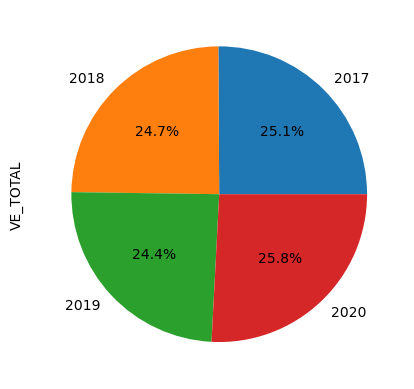

In [19]:
df_weather_year = df.groupby('YEAR')['VE_TOTAL'].sum()
df_weather_year
df_weather_year.plot(kind='pie',y='VE_TOTAL',autopct='%1.1f%%')
# In 2020 the pandemic started and it is the year with the most number of accidents. Stay at home rules were in effect.

October is the month with thehighest accidents for 2020, with a total of: 20242


<AxesSubplot:title={'center':'Numbers of Accidents in 2020'}, xlabel='Months', ylabel='Accidents in 2020'>

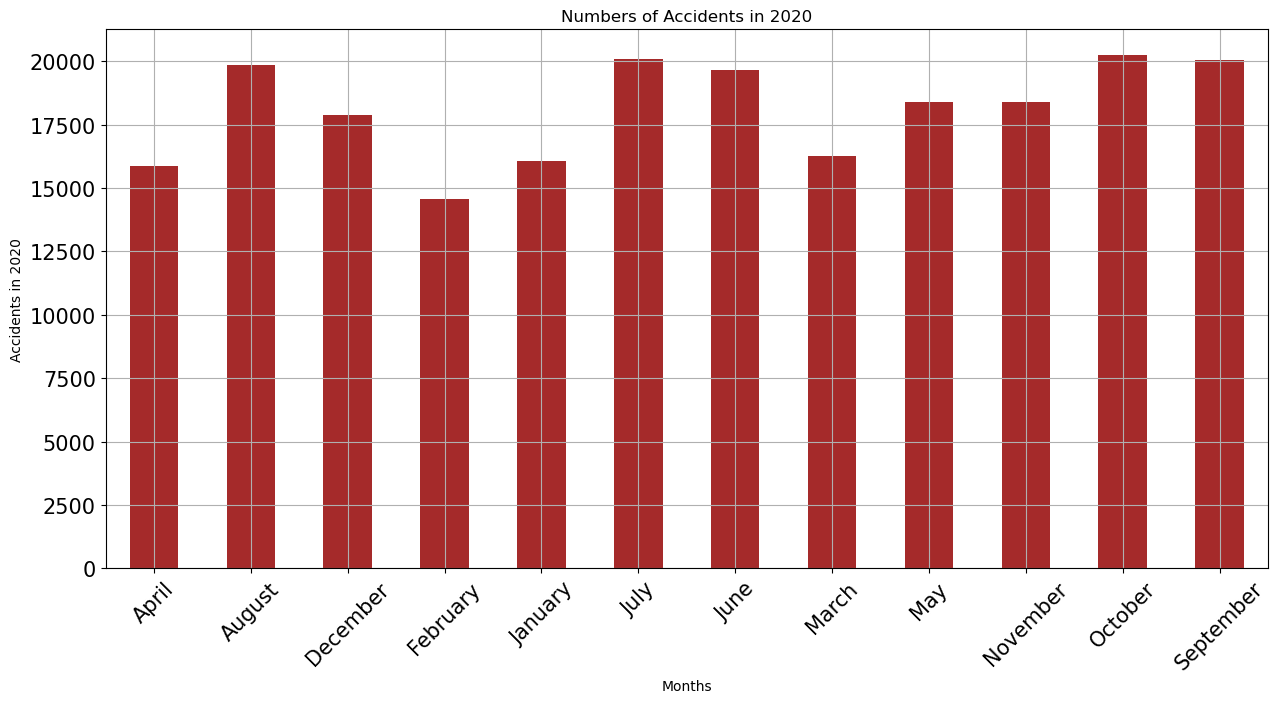

In [60]:
df_only_2020 = df.loc[df['YEAR'] == 2020,:]
df_2020_month = df.groupby(['MONTHNAME'])['VE_TOTAL'].sum()

max_month = df_2020_month.idxmax()
max_accidents = df_2020_month[max_month]

print(f'{max_month} is the month with thehighest accidents for 2020, with a total of: {max_accidents}')

df_2020_month.plot(kind='bar', color = ["brown"], figsize = (15, 7), rot = 45, fontsize = 15, xlabel= "Months", ylabel = "Accidents in 2020", title = "Numbers of Accidents in 2020", grid = True )

In [21]:
df_weather_summary = df.groupby(['WEATHERNAME'])['VE_TOTAL'].sum()

df_weather_summary.sort_values(ascending=False)

WEATHERNAME
Clear                       148720
Cloudy                       30513
Rain                         16349
Not Reported                 14758
Fog, Smog, Smoke              2459
Snow                          2363
Reported as Unknown            570
Sleet or Hail                  341
Severe Crosswinds              334
Blowing Snow                   238
Freezing Rain or Drizzle       181
Other                          177
Unknown                        123
Blowing Sand, Soil, Dirt        90
Name: VE_TOTAL, dtype: int64

<AxesSubplot:xlabel='WEATHERNAME'>

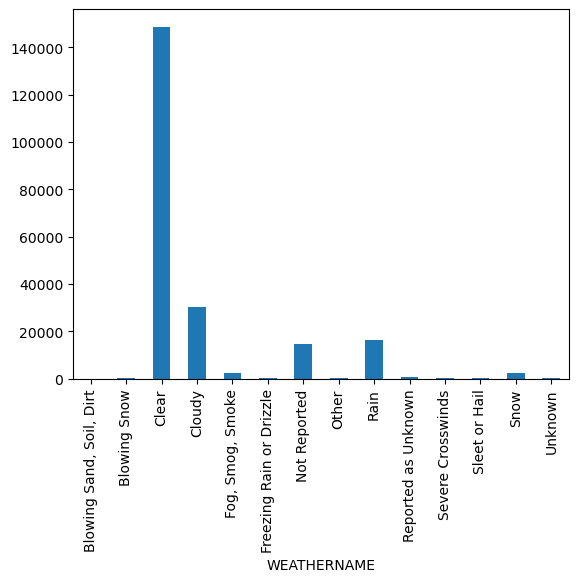

In [22]:
df_weather_summary.plot(kind='bar')

In [23]:
drunk_df = df.groupby(['STATENAME'])['DRUNK_DR'].sum()

max_month_dr = drunk_df.idxmax()
max_accidents = drunk_df[max_month_dr]

print(f'{max_month_dr} is the month with thehighest accidents for 2020, with a total of: {max_accidents}')

# df_2020_month.plot(kind='bar')
drunk_df.sort_values(ascending=False)

California is the month with thehighest accidents for 2020, with a total of: 4031


STATENAME
California              4031
Texas                   3519
Florida                 2695
Ohio                    1404
North Carolina          1392
South Carolina          1214
Georgia                 1176
Illinois                1164
Michigan                1155
Pennsylvania            1099
Missouri                 977
Virginia                 977
Tennessee                965
Louisiana                916
Alabama                  855
Arizona                  826
Wisconsin                811
Colorado                 795
New York                 763
Washington               697
Kentucky                 694
Oklahoma                 642
Indiana                  634
Maryland                 592
Oregon                   558
Arkansas                 548
New Jersey               498
Mississippi              484
Minnesota                445
New Mexico               414
Massachusetts            410
Connecticut              386
Nevada                   329
Montana                  321
Iowa

In [24]:
tp_df = df1.groupby(["STATENAME"])["POPULATION"].mean()

drunk_rate = drunk_df.div(tp_df) * 100
drunk_rate.sort_values(ascending=False)

STATENAME
Montana                 0.030171
Wyoming                 0.025722
South Carolina          0.023771
North Dakota            0.020644
New Mexico              0.019747
Louisiana               0.019634
Arkansas                0.018163
South Dakota            0.018041
Alabama                 0.017460
Oklahoma                0.016250
Mississippi             0.016220
Missouri                0.015924
Kentucky                0.015529
West Virginia           0.015302
Maine                   0.015201
Idaho                   0.014592
Nebraska                0.014444
Tennessee               0.014199
Wisconsin               0.013936
Colorado                0.013926
North Carolina          0.013357
Oregon                  0.013291
Alaska                  0.012770
Florida                 0.012632
Texas                   0.012226
Ohio                    0.012006
Michigan                0.011557
Vermont                 0.011517
Arizona                 0.011480
Virginia                0.011463


In [25]:
drunk_rate_df = pd.DataFrame(drunk_rate)
drunk_rate_df["STATENAME"] = accident_rate_df.index

max_idx_dr = drunk_rate_df[0].idxmax()

max_val_col1_dr = round(drunk_rate_df.loc[max_idx_dr, 0],4)
max_val_col2_dr = drunk_rate_df.loc[max_idx_dr, 'STATENAME']
state_dr = drunk_df[(drunk_df.index == max_val_col2_dr)]
num_dr= state_dr[0]


print(f"State with highest drunken drivers is {max_val_col2_dr} with {num_dr} accidents and a rate of {max_val_col1_dr}%")

State with highest drunken drivers is Montana with 321 accidents and a rate of 0.0302%


In [26]:
drunk_rate_df = pd.DataFrame(drunk_rate)
drunk_rate_df["STATENAME"] = accident_rate_df.index

min_idx_dr = drunk_rate_df[0].idxmin()

min_val_col1_dr = round(drunk_rate_df.loc[min_idx_dr, 0],4)
min_val_col2_dr = drunk_rate_df.loc[min_idx_dr, 'STATENAME']
state_dr = drunk_df[(drunk_df.index == min_val_col2_dr)]
num_dr= state_dr[0]
print(f"State with least drunken drivers is {min_val_col2_dr} with {num_dr} accidents and a rate of {min_val_col1_dr}%")

State with least drunken drivers is New York with 763 accidents and a rate of 0.0039%


<AxesSubplot:ylabel='VE_TOTAL'>

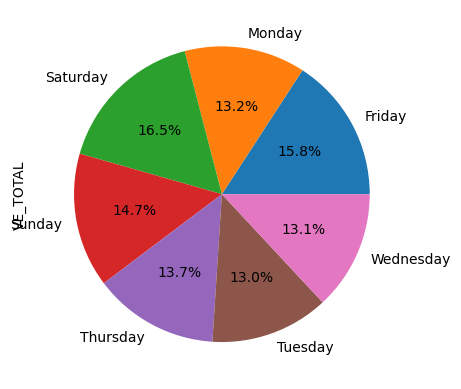

In [27]:
day_country = df1.groupby(["DAY_WEEKNAME"])["VE_TOTAL"].sum()
day_country.plot(kind='pie',y='TOTAL ACCIDENTS',autopct='%1.1f%%')